In [1]:
from utils.graphutils import Graph, Node, create_county_adjacency_dict_fips, create_voting_data_list
import networkx as nx
import random
from utils.polya_process import polya
import time
import matplotlib.pyplot as plt
import utils.population
import pandas as pd

In [2]:
#Set Initial Values
state_to_graph = 'Florida'
start_year = 2000   # Note: year MUST be a multiple of 4
end_year = 2004

#Get County Adjacency Matrix
neighbours = create_county_adjacency_dict_fips("data\countyadj.csv")
#populations = population.get_population_data(state=state_name,year=start_year)

#Get voting data
voting_data = create_voting_data_list("data\countypres_2000-2020.csv")

#Get FIPS (IDs) data for every county
county_fips = pd.read_csv('data/fips.csv',dtype=str, encoding='utf-8').set_index(["STATE","COUNTY"]).drop_duplicates()

#Define Graph variable
county_graph = Graph()

In [3]:
for county in neighbours:
    county_name = county_fips.loc[(county[:2],county[2:])]['CTYNAME']
    state_name = county_fips.loc[(county[:2],county[2:])]['STNAME']
    #print(f"{state_name} {county_name}")

    population = random.uniform(500,10000)  #Eventually, will be = populations[state][county]
    red = int(random.uniform(0,population)) # red = profile(2)
    blue = population - red
    county_graph.add_node(Node(
            id=county,
            county=county_name,
            state=state_name,
            red=red,
            blue=blue,
            population=population,
            neighbours = neighbours[county],
            reinforcement_parameter=10 #This is the initial reinforcement parameter. Will be overwritten once we have the birth function going.
    ))


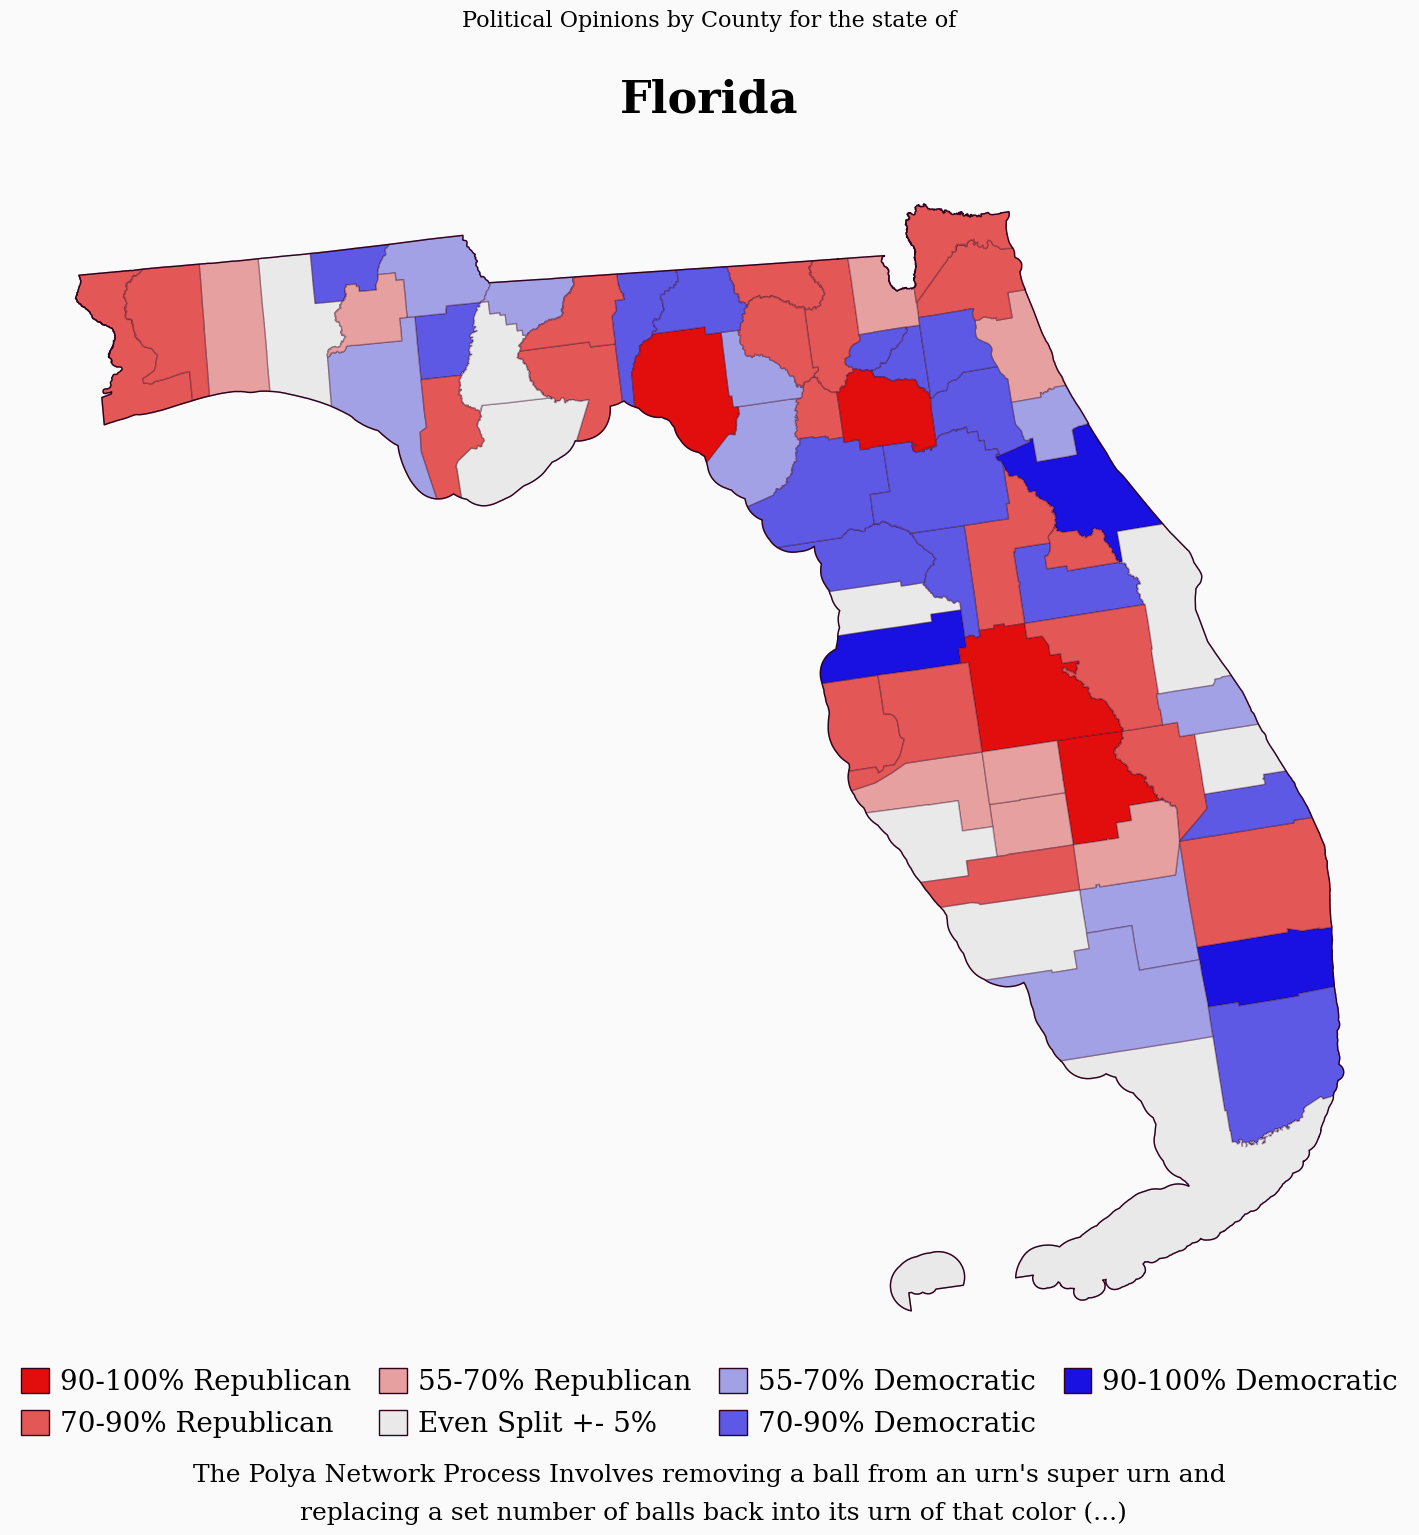

In [ ]:
#Display Graph Before Simulation
county_graph.visualize_map(state_to_graph,20)
#county_graph.graph_node_opinions(state_to_graph)